# Ticks, Grids, Labels, and Legends

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline 

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.3
NumPy Version: 1.18.1
Python Version: 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2020-03-05T16:15:05.404887


## Ticks

### Position

The following shows some examples of setting the tick locations

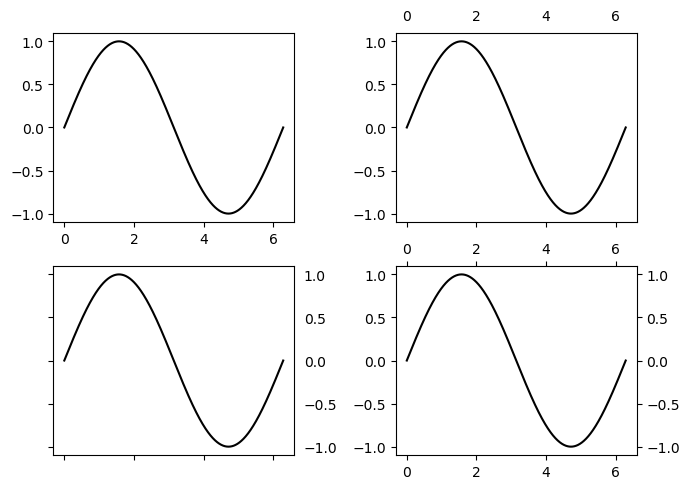

In [2]:
fig,axes = plt.subplots(2,2,figsize=(7,5),dpi=100)

X = np.linspace(0,2*np.pi,1000)
Y = np.sin(X)

for ax in axes.ravel(): #plot
    ax.plot(X,Y,'-k')

ax = axes[0,0]

ax = axes[0,1]
ax.tick_params(labeltop=True,labelbottom=False)

ax = axes[1,0]
ax.tick_params(labelright=True,labelbottom=False,labelleft=False)

ax = axes[1,1]
ax.tick_params(labeltop=True,labelbottom=True,labelright=True,labelleft=True)

# Also add ticks
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True)

fig.tight_layout()

### All Around 

And inside

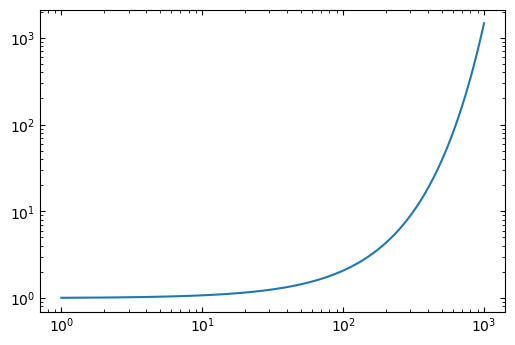

In [3]:
x = np.logspace(0,3,600)
y = 1.2**(0.04*x)
fig,ax = plt.subplots(dpi=100)
ax.plot(x,y)
ax.set(xscale='log',yscale='log')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

## Grids

Note that this is the same with and without a log scale but the log scale shows it better. The `zorder` makes sure the plot is in front of the grid lines

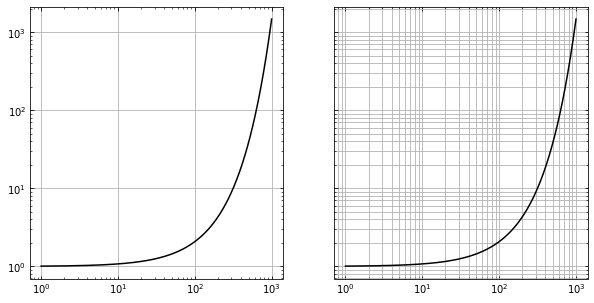

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,5))
x = np.logspace(0,3,600)
y = 1.2**(0.04*x)

for ax in (ax1,ax2):
    ax.plot(x,y,'-k')
    ax.set(xscale='log',yscale='log')
    ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',zorder=10)
ax1.grid(which='major')
ax2.grid(which='both')

## Labels

Rotated text and `ha` (horizontal alignment)

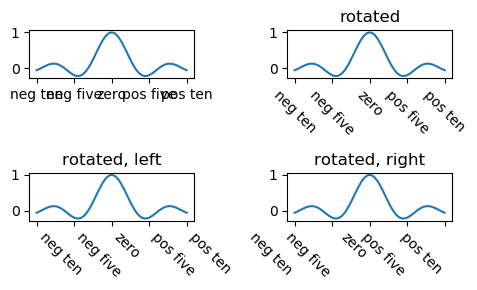

In [5]:
fig,axes = plt.subplots(2,2,figsize=(5,3),dpi=100)

x = np.linspace(-10,10,100)
y = np.sin(x)/(x + np.spacing(1))

labs = ['neg ten','neg five','zero','pos five','pos ten']

for ax in axes.ravel():
    ax.plot(x,y)
    ax.set_xticks([-10,-5,0,5,10])

axes[0,0].set_xticklabels(labs)

axes[0,1].set_xticklabels(labs,rotation=-45)
axes[0,1].set_title('rotated')

axes[1,0].set_xticklabels(labs,rotation=-45,ha='left')
axes[1,0].set_title('rotated, left')

axes[1,1].set_xticklabels(labs,rotation=-45,ha='right')
axes[1,1].set_title('rotated, right')


fig.tight_layout()

### Label Formatting

And prettier x-labels

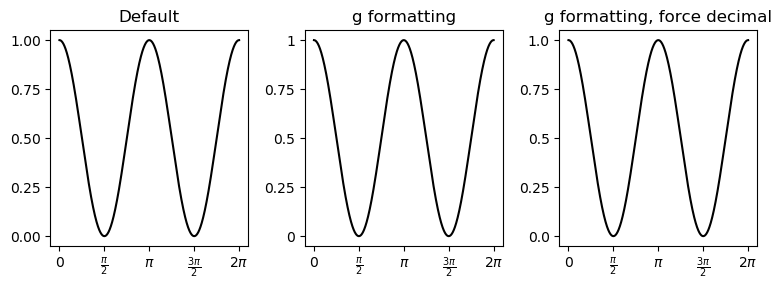

In [6]:
X = np.linspace(0,2*np.pi,1000)
Y = np.cos(X)**2

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8,3),dpi=100,num=1)
for ax in (ax1,ax2,ax3):
    ax.plot(X,Y,'k-')
    ax.set_yticks([0, 0.25, 0.5,0.75,1])
    ax.set_xticks(np.linspace(0,2*np.pi,5))
    ax.set_xticklabels([r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])

ax1.set_title('Default')

ax2.set_title('g formatting')
ax2.set_yticklabels( ['{:0.2g}'.format(l) for l in ax2.get_yticks()] )

ax3.set_title('g formatting, force decimal')
ax3.set_yticklabels( ['{:0.2g}'.format(l) if int(l)!=float(l) else '{:0.1f}'.format(l) 
                      for l in ax3.get_yticks()] )


fig.tight_layout()

## Legends

There are a few ways to work a legend. And there is a lot more that can be found on the web.

The main takeaway is to have `label=` in the respective plot

### Directly specify -- Not Suggested

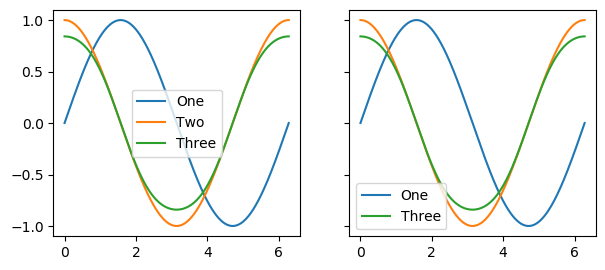

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

def plotEX(ax):
    pl = [None for i in range(3)]
    
    pl[0] = ax.plot(X,np.sin(X),label='One')
    pl[1] = ax.plot(X,np.cos(X),label='Two')
    pl[2] = ax.plot(X,np.sin(np.cos(X)),label='Three')
    return [p[0] for p in pl] # makes it just the objects
    
pl1 = plotEX(ax1) 
ax1.legend()

pl2 = plotEX(ax2) 
ax2.legend([pl2[0],pl2[2]],['One','Three'])

### Label Plots -- Suggested

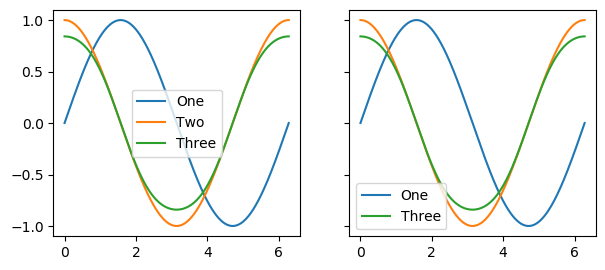

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

ax1.plot(X,np.sin(X),label='One')
ax1.plot(X,np.cos(X),label='Two')
ax1.plot(X,np.sin(np.cos(X)),label='Three')
ax1.legend()

ax2.plot(X,np.sin(X),label='One')
ax2.plot(X,np.cos(X)) # NO LABEL
ax2.plot(X,np.sin(np.cos(X)),label='Three')
ax2.legend()

### Number of points

Thankfully, the default was changed to one. In older Matplotlib it was two. Looked bad

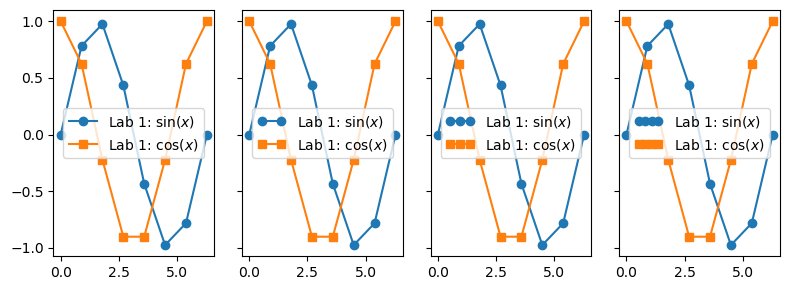

In [9]:
fig,axes = plt.subplots(1,4,figsize=(8,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,8)


for ii,ax in enumerate(axes):
    ax.plot(X,np.sin(X),'-o',label=r'Lab 1: $\sin(x)$')
    ax.plot(X,np.cos(X),'-s',label=r'Lab 1: $\cos(x)$')
    ax.legend(numpoints=(ii+1))
    
    
fig.tight_layout()

### Dummy Legends

This is useful if you want certain entries that are not to be plotted

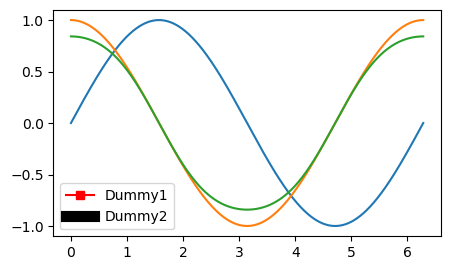

In [10]:
fig,ax = plt.subplots(1,1,figsize=(5,3),dpi=100,num=1,sharey=True)

X = np.linspace(0,2*np.pi,1000)

# Real Lines
ax.plot(X,np.sin(X),'-')
ax.plot(X,np.cos(X),'-')
ax.plot(X,np.sin(np.cos(X)),'-')

# Dummy lines
ax.plot([],'-rs',label='Dummy1')
ax.plot([],'k',label='Dummy2',LineWidth=8)
ax.legend()

### Legend in its own plot

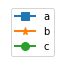

In [11]:
fig,ax = plt.subplots(1,1,figsize=(1,1))
ax.plot([],[],'-s',label='a',linewidth=2,ms=8)
ax.plot([],[],'-*',label='b',linewidth=2,ms=8)
ax.plot([],[],'-o',label='c',linewidth=2,ms=8)
ax.legend(loc='center',numpoints=1)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()